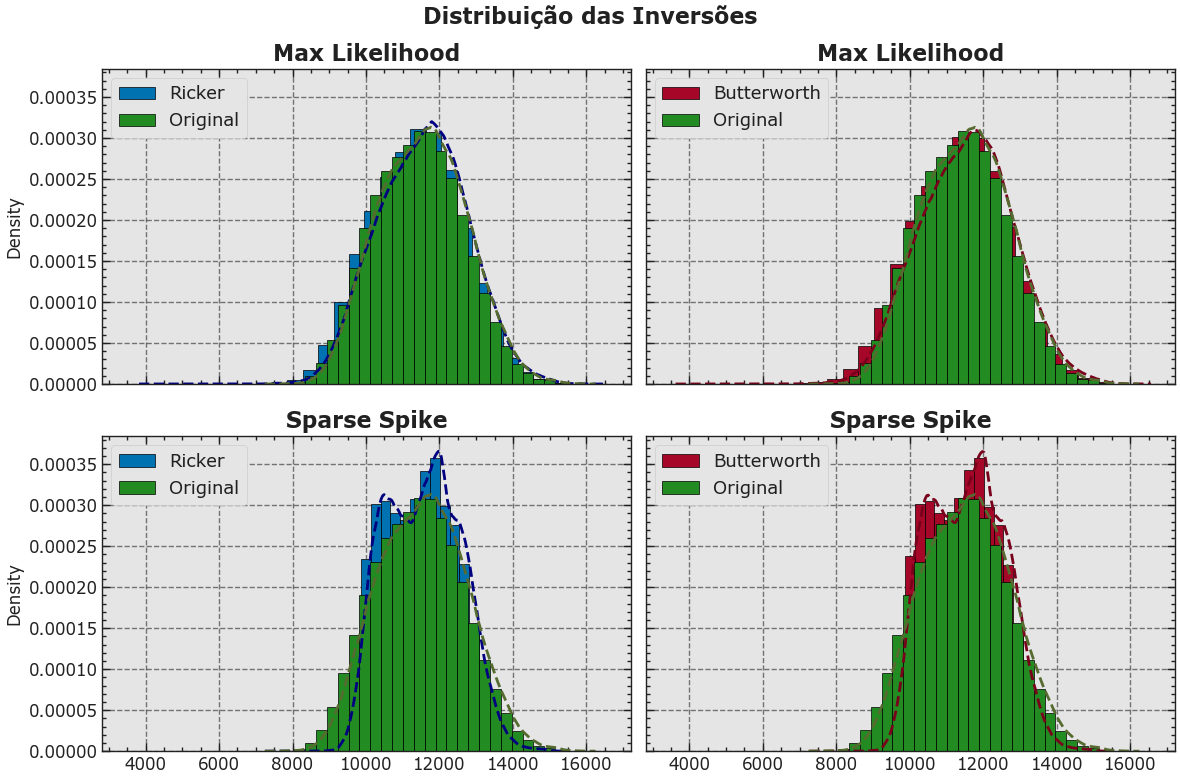

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylops
from scipy.signal import butter, filtfilt
from numpy.linalg import inv
import warnings
import scienceplots
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import matplotlib.lines as mlines

warnings.filterwarnings("ignore")
# seaborn-v0_8-bright
plt.style.use(["ggplot", "science", "grid", "notebook"])
# Shades of blue
PRIMARY = "#0072b2"
PRIMARY_DARK = "#000080"
# Shades of red
SECONDARY = "#a60628"
SECONDARY_DARK = "#79011B"
# Shades of green
TERCIARY = "#228b22"
TERCIARY_DARK = "#556b2f"
# Shades of yellow
ALTERNATIVE = "#edb230"
ALTERNATIVE_DARK = "#e77728"
# Shades of black
TEXT_COLOR = "#212121"
plt.rc("font", family="Verdana")
FONT_SIZE = 16
LABEL_SIZE = 12
PARAM_SIZE = 14
VMIN = 6000
VMAX = 17000

plt.rcParams.update(
    {
        "axes.labelsize": LABEL_SIZE,
        "axes.titlesize": FONT_SIZE,
        "xtick.labelsize": LABEL_SIZE,
        "ytick.labelsize": LABEL_SIZE,
        "text.color": TEXT_COLOR,
        "axes.labelcolor": TEXT_COLOR,
        "axes.edgecolor": TEXT_COLOR,
        "xtick.color": TEXT_COLOR,
        "ytick.color": TEXT_COLOR,
        # "figure.facecolor": "white",
        # "axes.facecolor": "white",
    }
)

imp_30hz = np.load("Uncompressed/impedance_30hz.npy")
imp_back = np.load("Uncompressed/impedance_background.npy")
ricker_max_likelihood = np.load("Uncompressed/inverted_max_likelihood_ricker.npy")
butter_max_likelihood = np.load("Uncompressed/inverted_max_likelihood_butter.npy")
ricker_sparse_spike = np.load("Uncompressed/inverted_sparse_spike_ricker.npy")
butter_sparse_spike = np.load("Uncompressed/inverted_sparse_spike_butter.npy")

residuo_max_likelihood_ricker = imp_30hz - ricker_max_likelihood
residuo_max_likelihood_butter = imp_30hz - butter_max_likelihood
residuo_sparse_spike_ricker = imp_30hz - ricker_sparse_spike
residuo_sparse_spike_butter = imp_30hz - butter_sparse_spike

# Global variables
# Used in most cases

nx, ny, nz = imp_30hz.shape

import seaborn as sns
from matplotlib.ticker import ScalarFormatter

bins = 30

hist_original, bin_edges_original = np.histogram(imp_30hz, bins=bins, density=True)

ml_hist_ricker, ml_bin_edges_ricker = np.histogram(ricker_max_likelihood, bins=bins, density=True)
ml_hist_butter, ml_bin_edges_butter = np.histogram(butter_max_likelihood, bins=bins, density=True)

ss_hist_ricker, ss_bin_edges_ricker = np.histogram(ricker_sparse_spike, bins=bins, density=True)
ss_hist_butter, ss_bin_edges_butter = np.histogram(butter_sparse_spike, bins=bins, density=True)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True, sharex=True)
fig.suptitle("Distribuição das Inversões", fontsize=FONT_SIZE, fontweight="bold", color=TEXT_COLOR)

# Define a function to plot histograms and KDEs
def plot_hist_kde(ax, hist_data, bin_edges, kde_data, hist_color, kde_color, title, label):
    ax.bar(
        bin_edges[:-1], hist_data, width=np.diff(bin_edges),
        edgecolor="black", color=hist_color, alpha=1, label=label
    )
    sns.kdeplot(
        kde_data.flatten(), color=kde_color, linewidth=2,
        linestyle="--", alpha=1.0, bw_adjust=0.5, ax=ax
    )
    ax.tick_params(axis="both", labelsize=LABEL_SIZE)
    ax.set_title(title, fontsize=FONT_SIZE, fontweight="bold", color=TEXT_COLOR)
    ax.legend(loc="upper left", fontsize=FONT_SIZE - 3)

# Plot data
plot_hist_kde(axs[0, 0], ml_hist_ricker, ml_bin_edges_ricker, ricker_max_likelihood, PRIMARY, PRIMARY_DARK, "Max Likelihood", "Ricker")
plot_hist_kde(axs[0, 0], hist_original, bin_edges_original, imp_30hz, TERCIARY, TERCIARY_DARK, "Max Likelihood", "Original")

plot_hist_kde(axs[0, 1], ml_hist_butter, ml_bin_edges_butter, butter_max_likelihood, SECONDARY, SECONDARY_DARK, "Max Likelihood", "Butterworth")
plot_hist_kde(axs[0, 1], hist_original, bin_edges_original, imp_30hz, TERCIARY, TERCIARY_DARK, "Max Likelihood", "Original")

plot_hist_kde(axs[1, 0], ss_hist_ricker, ss_bin_edges_ricker, ricker_sparse_spike, PRIMARY, PRIMARY_DARK, "Sparse Spike", "Ricker")
plot_hist_kde(axs[1, 0], hist_original, bin_edges_original, imp_30hz, TERCIARY, TERCIARY_DARK, "Sparse Spike", "Original")

plot_hist_kde(axs[1, 1], ss_hist_butter, ss_bin_edges_butter, butter_sparse_spike, SECONDARY, SECONDARY_DARK, "Sparse Spike", "Butterworth")
plot_hist_kde(axs[1, 1], hist_original, bin_edges_original, imp_30hz, TERCIARY, TERCIARY_DARK, "Sparse Spike", "Original")

plt.tight_layout()
plt.savefig("Figures/stats/histograma_pesado.png", dpi=500, bbox_inches="tight")
plt.show()